In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [5]:
# Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flattening data for Logistic Regression (Traditional ML requires 1D input)
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [7]:
# Updated for scikit-learn compatibility
lr_model = LogisticRegression(max_iter=100, solver='lbfgs') 
lr_model.fit(train_images_flat[:10000], train_labels[:10000].ravel())

lr_acc = lr_model.score(test_images_flat, test_labels)
print(f"Logistic Regression Accuracy: {lr_acc * 100:.2f}%")

Logistic Regression Accuracy: 37.48%


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4373 - loss: 1.5444 - val_accuracy: 0.5308 - val_loss: 1.3178
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5799 - loss: 1.1840 - val_accuracy: 0.6052 - val_loss: 1.1185
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6341 - loss: 1.0410 - val_accuracy: 0.6515 - val_loss: 0.9991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6672 - loss: 0.9447 - val_accuracy: 0.6738 - val_loss: 0.9378
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6933 - loss: 0.8726 - val_accuracy: 0.6834 - val_loss: 0.9063
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7142 - loss: 0.8111 - val_accuracy: 0.6836 - val_loss: 0.9176
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7318 - loss: 0.7665 - val_accuracy: 0.6871 - val_loss: 0.9098
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7445 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


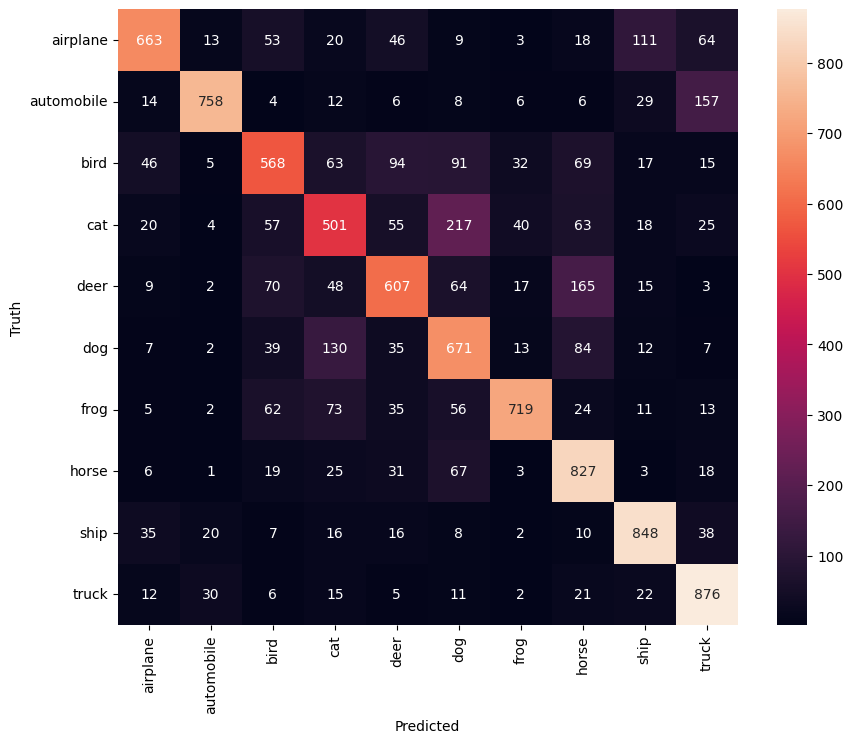

In [9]:
y_pred = np.argmax(cnn_model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()